In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Load data

In [2]:
df = pd.read_csv("data/week2/2020225_jason_up_cherrypick.dat", delimiter='\t')
df = df.set_index("T(K)")
df = df.drop("Time(Min)", axis="columns")
df.head()

,(0 Deg.)M.S.(uV),(0 Deg.)STD(uV),(90 Deg.)M.S.(uV),(90 Deg.)STD(uV)
T(K),,,,
90.7,-63.78,0.0,27.07,0.07
90.8,-63.78,0.0,27.00,0.03
91.0,-63.78,0.0,26.80,0.15
91.4,-63.78,0.0,26.80,0.03
91.5,-63.78,0.0,26.58,0.03


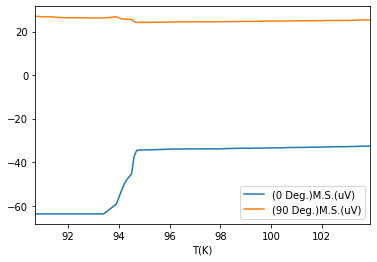

In [3]:
df.plot(None, ["(0 Deg.)M.S.(uV)", "(90 Deg.)M.S.(uV)"])

# Combine both channel

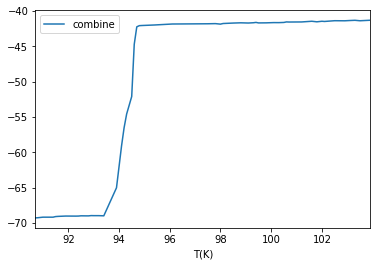

In [4]:
df["combine"] = -(df["(0 Deg.)M.S.(uV)"]**2 + df["(90 Deg.)M.S.(uV)"]**2)**0.5

df.plot(None, "combine")

# Calibrate voltage

(-43, -40)

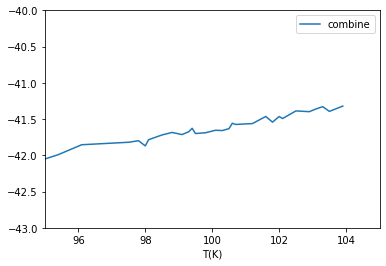

In [5]:
# Remove offset
df.plot(None, "combine")
plt.xlim([95,105])
plt.ylim([-43, -40])


[  0.07737245 -49.36787436]


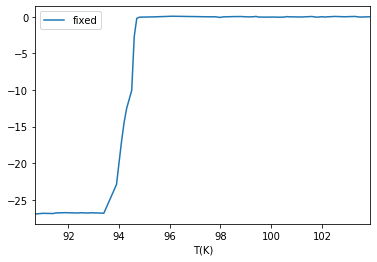

In [6]:
indices = (df.index > 95) & (df.index < 105)
values = df.iloc[indices]["combine"]
temps = values.index.values
volts = values.values

p_values = np.polyfit(temps, volts, 1)
print(p_values)
p_func = np.poly1d(p_values)

df["fixed"] = df["combine"] - p_func(df.index.values)
df.plot(None, "fixed")

Text(0.5, 0, 'Temperature (K)')

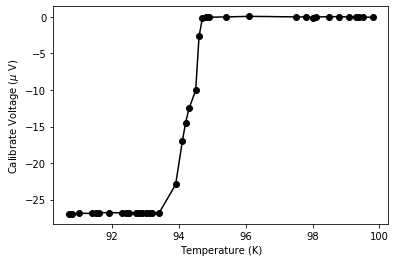

In [9]:
x = df.index.values
y = df["fixed"].values

indices = x < 100
x = x[indices]
y = y[indices]

plt.figure(figsize=(6,4))

plt.scatter(x,y, c='k')
plt.plot(x,y, c='k')

plt.ylabel("Calibrate Voltage ($\mu$ V)")
plt.xlabel("Temperature (K)")

Text(0.5, 0, 'Temperature (K)')

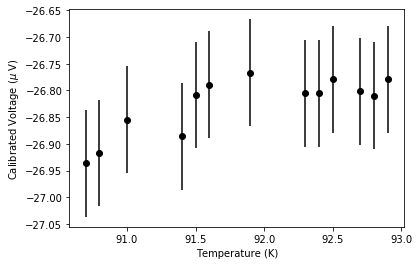

In [11]:
x = df.index.values
y = df["fixed"].values

indices = x < 93
x = x[indices]
y = y[indices]

plt.figure(figsize=(6,4))

plt.scatter(x,y, c='k')
plt.errorbar(x,y,yerr=0.1, fmt="none", c='k')

plt.ylabel("Calibrated Voltage ($\mu$ V)")
plt.xlabel("Temperature (K)")

# Normalize voltage


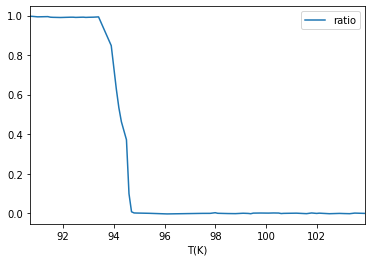

In [46]:
df["ratio"] = df["fixed"] / (df["fixed"].iloc[0] -0.1)
df.plot(None, "ratio")

# Find length


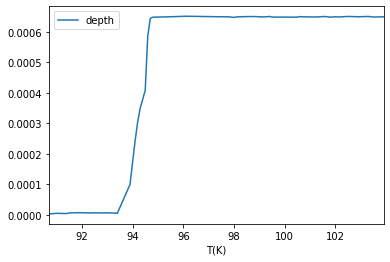

In [47]:
len_0 = 3000e-10
thick = 1.3e-3 
len_func = lambda r: (thick - r*(thick-2*len_0))/2

df["depth"] = len_func(df["ratio"].values)
df.plot(None, "depth")

# Find T_c and normalize temperature


(93, 95)

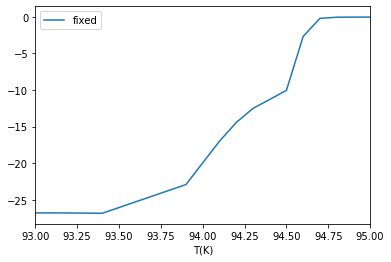

In [48]:
df.plot(None, "fixed")
plt.xlim([93,95])

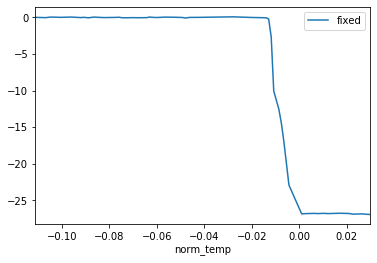

In [49]:
# Normalize temperature
T_c = 93.5
df["norm_temp"] = (T_c - df.index.values)/T_c

df.plot("norm_temp", "fixed")


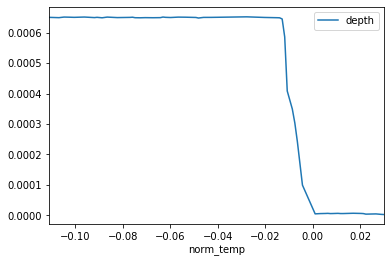

In [50]:
df.plot("norm_temp", "depth")

# For depth we only care about after T_c

Text(0, 0.5, 'penetration depth')

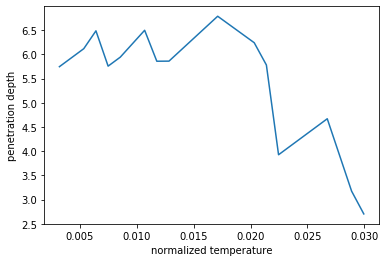

In [51]:
indices = (df["norm_temp"].values > 2e-3)
temps = df.iloc[indices]["norm_temp"].values
depth = df.iloc[indices]["depth"].values*1e6

plt.plot(temps, depth)
plt.xlabel("normalized temperature")
plt.ylabel("penetration depth")

Text(0, 0.5, 'penetration depth')

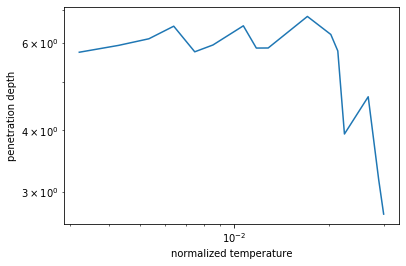

In [52]:
plt.loglog(temps, depth)
plt.xlabel("normalized temperature")
plt.ylabel("penetration depth")

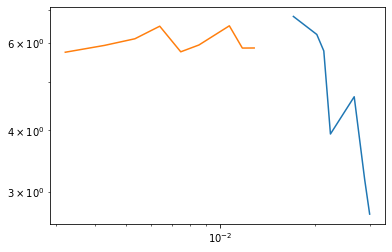

In [53]:
split = 7
plt.loglog(temps[:split], depth[:split])
plt.loglog(temps[split:], depth[split:])

# plt.xlim([1e-2, 6e-2])

[-1.54106637 -4.27715035] [0.01641706 1.87552109]


([<matplotlib.axis.YTick at 0x7f80ae71fc90>,
 <a list of 4 Text yticklabel objects>)

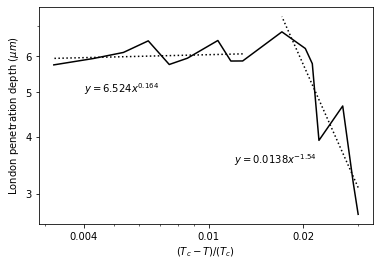

In [81]:
temps_log = np.log(temps)
depth_log = np.log(depth)

p_values1 = np.polyfit(temps_log[:split], depth_log[:split], 1)
p_values2 = np.polyfit(temps_log[split:], depth_log[split:], 1)
p_func = lambda p_values, temps : np.exp(p_values[1])*temps**p_values[0]

print(p_values1, p_values2)

plt.figure(figsize=(6,4))

plt.loglog(temps, depth, c='k')

plt.loglog(temps[:split], p_func(p_values1, temps[:split]), c='k', linestyle=":")
plt.loglog(temps[split:], p_func(p_values2, temps[split:]), c='k', linestyle=":")

plt.ylabel("London penetration depth ($\mu m$)")
plt.xlabel(r"$(T_c - T)/(T_c)$")

plt.annotate("$y=6.524x^{0.164}$", (4e-3, 5))

plt.annotate("$y=0.0138x^{-1.54}$", (0.012, 3.5))

plt.xticks([4e-3, 1e-2, 2e-2], [4e-3, 1e-2, 2e-2])
plt.yticks([3, 4, 5, 6], [3, 4, 5, 6])

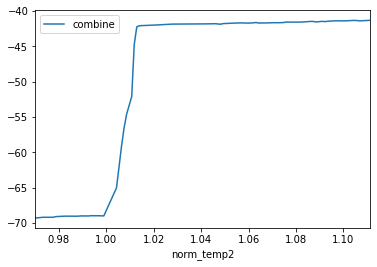

In [82]:
# Normalize temperature
T_c = 93.5
df["norm_temp2"] = (df.index.values)/T_c

df.plot("norm_temp2", "combine")


(0, 1e-05)

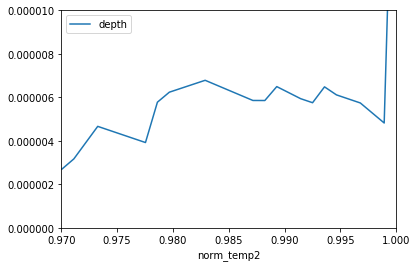

In [83]:
df.plot("norm_temp2", "depth")
plt.xlim([0.97,1])
plt.ylim([0, 1e-5])

Text(0, 0.5, 'penetration depth')

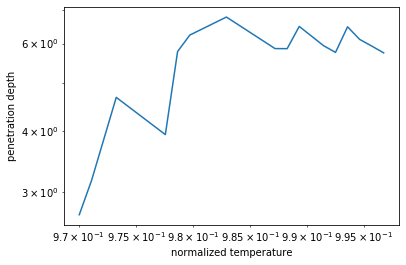

In [93]:
indices = (df["norm_temp2"].values < 0.997)
temps = df.iloc[indices]["norm_temp2"].values
depth = df.iloc[indices]["depth"].values * 1e6

plt.loglog(temps, depth)
plt.xlabel("normalized temperature")
plt.ylabel("penetration depth")

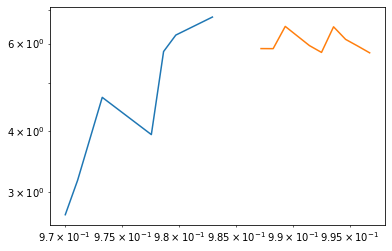

In [94]:
split = 7
plt.loglog(temps[:split], depth[:split])
plt.loglog(temps[split:], depth[split:])

# plt.xlim([1e-2, 6e-2])

[65.07314941  3.0788383 ] [-1.14406952  1.78539172]


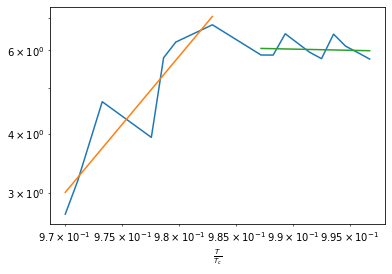

In [95]:
temps_log = np.log(temps)
depth_log = np.log(depth)

p_values1 = np.polyfit(temps_log[:split], depth_log[:split], 1)
# p_func1 = np.poly1d(p_values1)


p_values2 = np.polyfit(temps_log[split:], depth_log[split:], 1)
# p_func2 = np.poly1d(p_values2)

p_func = lambda p_values, temps : np.exp(p_values[1])*temps**p_values[0]


plt.loglog(temps, depth)

plt.loglog(temps[:split], p_func(p_values1, temps[:split]))
plt.loglog(temps[split:], p_func(p_values2, temps[split:]))

plt.xlabel(r"$\frac{T}{T_c}$")

print(p_values1, p_values2)